# Notebook TITANIC
<br>

Notebook **Python Azure ML service** pour la modélisation automatique (AUTOML) de la survie des passagers du Titanic.

Plus d'information sur Azure ML service : https://azure.microsoft.com/en-us/services/machine-learning-service/

Le naufrage du **RMS Titanic** est l'un des naufrages les plus terribles de l'histoire.  Le 15 avril 1912, lors de son voyage inaugural, le Titanic coule après avoir heurté un iceberg, tuant 1502 des 2224 passagers et membres d'équipage. Cette tragédie sensationnelle a choqué la communauté internationale et a conduit à une meilleure réglementation de la sécurité des navires.

L'une des raisons pour lesquelles le naufrage a causé de telles pertes de vie est qu'il n'y avait pas assez d'embarcations de sauvetage pour les passagers et l'équipage. Bien qu'il y ait eu un peu de chance pour survivre au naufrage, certains groupes de personnes avaient plus de chances de survivre que d'autres, comme les femmes, les enfants et les membres de la classe supérieure.


<img src="https://kwmp.ca/wp-content/uploads/2018/04/titanic-the-musical-1024x538.jpg" width="700" Height="700">

 ## Description des variables :
 - PassengerId: and id given to each traveler on the boat
 - Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
 - The Name of the passeger
 - The Sex
 - The Age
 - SibSp: number of siblings and spouses traveling with the passenger
 - Parch: number of parents and children traveling with the passenger
 - The ticket number
 - The ticket Fare
 - The cabin number
 - The embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

> Plus d'information sur les données : https://www.kaggle.com/c/titanic

## Utilisation Azure ML service :

<img src="https://raw.githubusercontent.com/MicrosoftDocs/azure-docs/master/articles/machine-learning/service/media/overview-what-is-azure-ml/aml.png">

> Documentation : https://azure.microsoft.com/en-us/services/machine-learning-service/
<br>

### 0. Paramétrage

In [2]:
# Version python 3.6
import sys
sys.version

'3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]'

In [3]:
# Version actuelle : 1.0.17

import azureml.core
print("Version Azure ML Service :", azureml.core.VERSION)

Version Azure ML Service : 1.0.17


> Pour installer azure ML service SDK : https://docs.microsoft.com/en-us/python/api/overview/azure/ml/install?view=azure-ml-py

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.train.automl import AutoMLConfig
from azureml.train.automl.run import AutoMLRun

import logging
import os
import random

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

In [5]:
# Installation SEABORN pour les graphiques
#!pip install seaborn
import seaborn as sns

## 1. Chargement des données

In [6]:
url="https://raw.githubusercontent.com/retkowsky/titanic/master/train.csv"
train=pd.read_csv(url, index_col=None, na_values=['NA'])

# Suppression valeurs manquantes
train = train.dropna()

In [7]:
# Nombre de col et de lignes
print(train.shape)

(183, 12)


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [10]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.70,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.55,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.00,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.50,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.00,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.73,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.98,B30,C


In [11]:
# Suppression de colonnes
train = train.drop(['Cabin','Parch'],axis=1)

In [12]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,PC 17599,71.28,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,113803,53.10,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,17463,51.86,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,PP 9549,16.70,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,113783,26.55,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,248698,13.00,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,113788,35.50,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,19950,263.00,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,PC 17572,76.73,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,113509,61.98,C


## 2. Analyses exploratoires

In [13]:
# Statistiques
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
count,183.00,183.00,183.00,183.00,183.00,183.00
mean,455.37,0.67,1.19,35.67,0.46,78.68
std,247.05,0.47,0.52,15.64,0.64,76.35
min,2.00,0.00,1.00,0.92,0.00,0.00
25%,263.50,0.00,1.00,24.00,0.00,29.70
50%,457.00,1.00,1.00,36.00,0.00,57.00
75%,676.00,1.00,1.00,47.50,1.00,90.00
max,890.00,1.00,3.00,80.00,3.00,512.33


In [14]:
# Corrélations
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
PassengerId,1.00,0.15,-0.09,0.03,-0.08,0.03
Survived,0.15,1.00,-0.03,-0.25,0.11,0.13
Pclass,-0.09,-0.03,1.00,-0.31,-0.10,-0.32
Age,0.03,-0.25,-0.31,1.00,-0.16,-0.09
SibSp,-0.08,0.11,-0.10,-0.16,1.00,0.29
Fare,0.03,0.13,-0.32,-0.09,0.29,1.00


### Distribution variable Cible

Text(0.5, 1.0, 'Survie (1 = Survie, 0 = Décès)')

<Figure size 432x288 with 0 Axes>

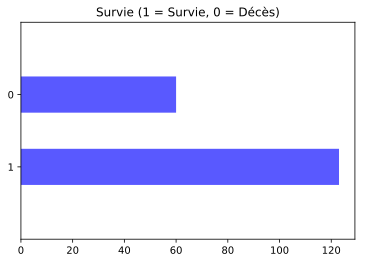

In [15]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
train.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(train.Survived.value_counts())) 
plt.title("Survie (1 = Survie, 0 = Décès)")

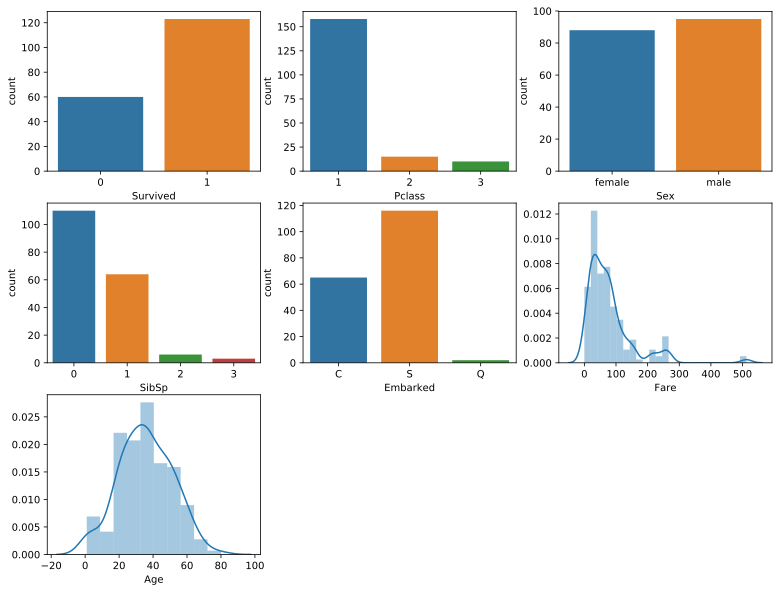

In [16]:
categ =  [ 'Survived', 'Pclass', 'Sex', 'SibSp', 'Embarked']
conti = ['Fare', 'Age']

fig = plt.figure(figsize=(13, 10))
for i in range (0,len(categ)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(x=categ[i], data=train);  

for col in conti:
    fig.add_subplot(3,3,i + 2)
    sns.distplot(train[col].dropna());
    i += 1
    
plt.show()
fig.clear()

## Tables Pivot

In [17]:
# Répartition par Sexe
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.93
male,0.43


In [18]:
# Répartition par Classe
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.96,0.89,0.60
male,0.42,0.67,0.40


In [19]:
Age = pd.cut(train['Age'], [0, 18, 80])
train.pivot_table('Survived', ['Sex', Age], 'Pclass')

Pclass             1    2    3
Sex    Age                    
female (0, 18]  0.91 1.00 0.50
       (18, 80] 0.97 0.88 0.67
male   (0, 18]  0.80 1.00 1.00
       (18, 80] 0.39 0.33 0.25

In [20]:
train.pivot_table('Survived', ['SibSp', Age], 'Pclass')

Pclass            1    2    3
SibSp Age                    
0     (0, 18]  1.00  nan 0.50
      (18, 80] 0.60 0.73 0.50
1     (0, 18]  0.75 1.00 1.00
      (18, 80] 0.73  nan 0.00
2     (0, 18]  1.00 1.00  nan
      (18, 80] 0.67  nan  nan
3     (18, 80] 0.67  nan  nan

### Distribution variable pclass

In [21]:
train.pivot_table('Survived', index='Pclass')

,Survived
Pclass,
1,0.67
2,0.80
3,0.50


In [22]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
1,2,0.80
0,1,0.67
2,3,0.50


### Distribution variable sexe

In [23]:
train.pivot_table('Survived', index='Sex')

,Survived
Sex,
female,0.93
male,0.43


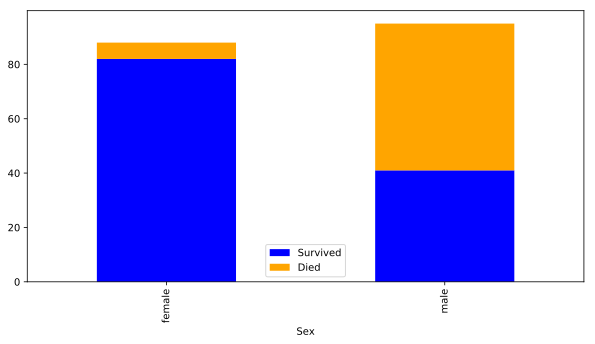

In [24]:
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5),
                                                          stacked=True, color=['b', 'orange']);

### Distribution variable Sexe en %

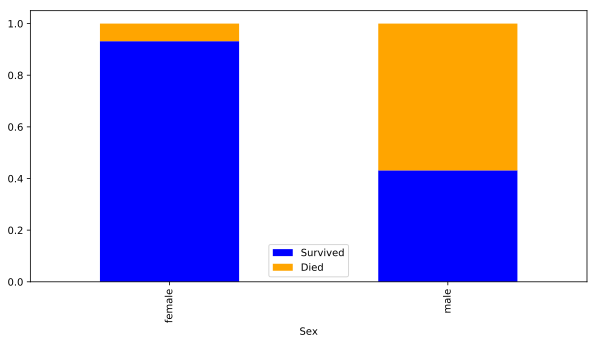

In [25]:
train.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), 
                                                           stacked=True, color=['b', 'orange']);

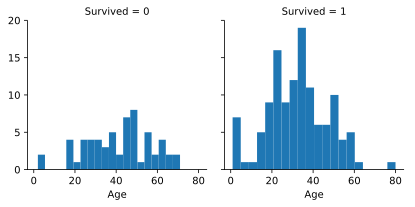

In [26]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

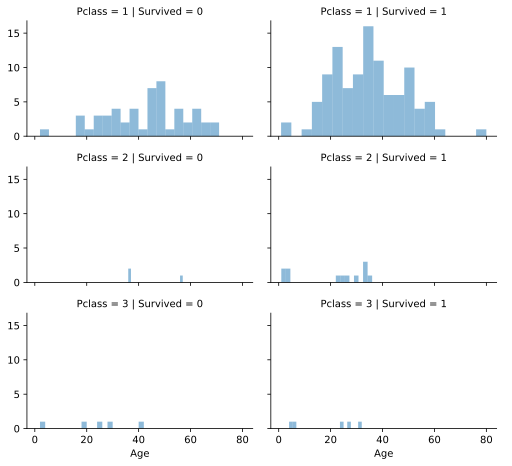

In [27]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

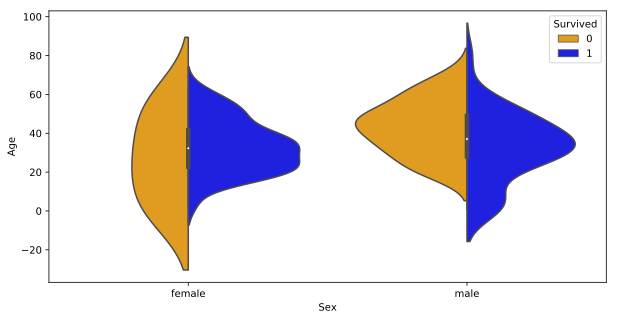

In [28]:
fig = plt.figure(figsize=(10, 5))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=train, 
               split=True,
               palette={0: "orange", 1: "b"}
              );

### Analyse de l'influence du prix

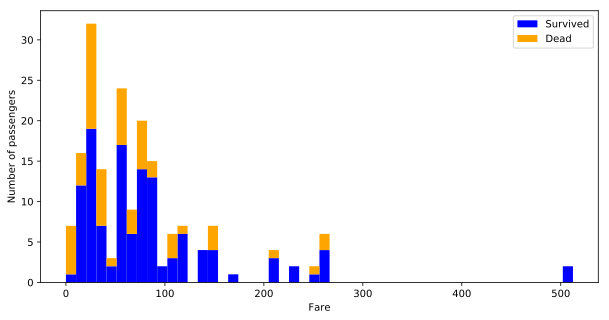

In [29]:
figure = plt.figure(figsize=(10, 5))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, color = ['b','orange'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

### Analyse de la cible


Number of survivors and non-survivors : 
 1    123
0     60
Name: Survived, dtype: int64

Percentage of survivors and non-survivors : 
 1   67.21
0   32.79
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Distribution of Survival, (1 = Survived)')

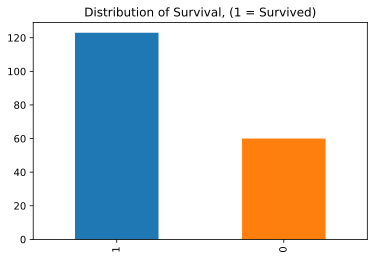

In [30]:
print("\nNumber of survivors and non-survivors : \n",train['Survived'].value_counts())
print("\nPercentage of survivors and non-survivors : \n",train['Survived'].value_counts() * 100 / len(train))

alpha_color = 0.7
train['Survived'].value_counts().plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")


Min age = 0.92
Max age = 80.0


Text(0.5, 1.0, 'Survival by Age,  (1 = Survived)')

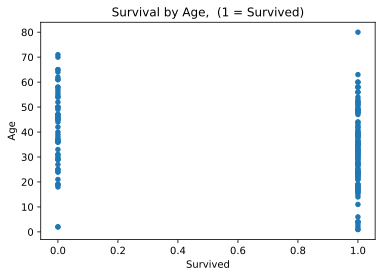

In [31]:
print("\nMin age =",train['Age'].min())
print("Max age =",train['Age'].max())

train.plot(kind='scatter',x='Survived',y='Age')
plt.title("Survival by Age,  (1 = Survived)")



Number of passengers in each classes: 
 1    158
2     15
3     10
Name: Pclass, dtype: int64


,PassengerId,Survived,Age,SibSp,Fare,Died
Pclass,,,,,,
1,467.22,0.67,37.59,0.49,88.68,0.33
2,343.27,0.80,25.27,0.40,18.44,0.20
3,436.20,0.50,21.00,0.20,11.03,0.50


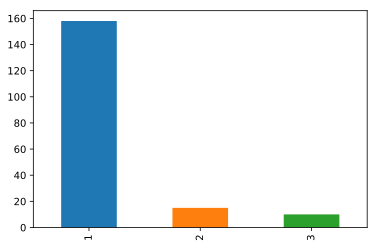

In [32]:
print("\n\nNumber of passengers in each classes: \n",train['Pclass'].value_counts())
train['Pclass'].value_counts().sort_index().plot(kind='bar')
train.groupby('Pclass').mean()

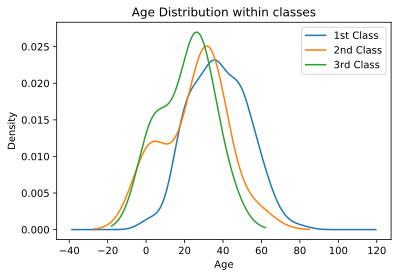

In [35]:
plt.subplot2grid((1,1),(0,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
train.Age[train.Pclass == 1].plot(kind='kde')    
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
 # plots antitanic axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

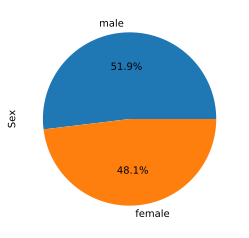

In [36]:
train['Sex'].value_counts().plot(kind='pie',autopct='%1.01f%%')

In [37]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.93
1,male,0.43


In [38]:
genderclass = train.groupby(['Pclass','Sex']).mean()
genderclass

PassengerId  Survived   Age  SibSp   Fare  Died
Pclass Sex                                                    
1      female       472.78      0.96 34.09   0.58 103.13  0.04
       male         462.32      0.42 40.67   0.40  75.96  0.58
2      female       440.67      0.89 29.61   0.22  14.87  0.11
       male         197.17      0.67 18.75   0.67  23.81  0.33
3      female       337.60      0.60 17.20   0.40  13.36  0.40
       male         534.80      0.40 24.80   0.00   8.70  0.60

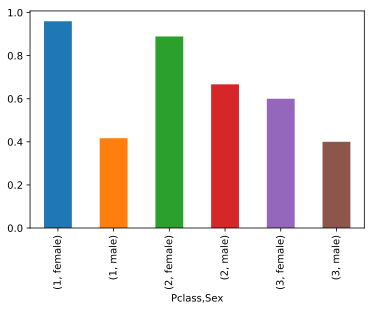

In [39]:
genderclass['Survived'].plot.bar()

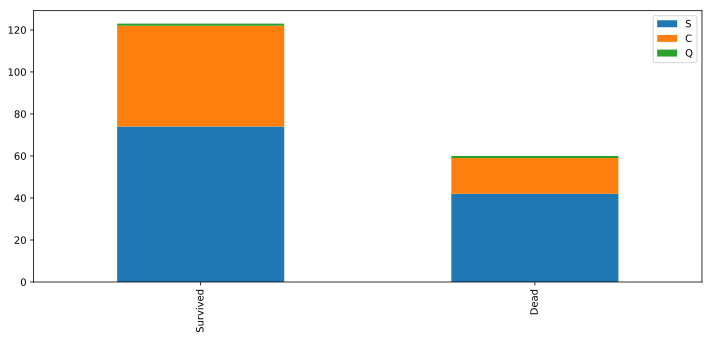

In [40]:
survived_embark = train[train['Survived']==1]['Embarked'].value_counts()
dead_embark = train[train['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(12,5))

## 3. Modélisation AutoML avec Azure ML service

<img src="https://blog.cellenza.com/wp-content/uploads/2018/11/automl.png">

In [42]:
col_target=['Survived']
col_train=['Age','Pclass','Sex','Fare','SibSp']
X=train[col_train]
y=train[col_target]

In [44]:
y.head()

,Survived
1,1
3,1
6,0
10,1
11,1


In [45]:
X.head()

,Age,Pclass,Sex,Fare,SibSp
1,38.00,1,female,71.28,1
3,35.00,1,female,53.10,1
6,54.00,1,male,51.86,0
10,4.00,3,female,16.70,1
11,58.00,1,female,26.55,0


In [46]:
dic = {'male':0,'female':1}
X['Sex']=X['Sex'].apply(lambda x:dic[x])

In [47]:
X.head()

,Age,Pclass,Sex,Fare,SibSp
1,38.00,1,1,71.28,1
3,35.00,1,1,53.10,1
6,54.00,1,0,51.86,0
10,4.00,3,1,16.70,1
11,58.00,1,1,26.55,0


### 3.1 Partitionnement des données

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10)

In [52]:
print(X.shape)

(183, 5)


In [53]:
print(X_train.shape)

(128, 5)


In [54]:
print(X_test.shape)

(55, 5)


### 3.2 Connexion workspace Azure ML service

In [56]:
ws = Workspace.from_config()

experiment_name = 'titanic'
project_folder = './sample_projects/titanic'

experiment = Experiment(ws, experiment_name)

output = {}
output['SDK version'] = azureml.core.VERSION
output['Workspace Name'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Project Directory'] = project_folder
output['Experiment Name'] = experiment.name
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(data = output, index = ['']).T

Found the config file in: C:\Users\seretkow\notebooks\Labs Azure ML service\aml_config\config.json


,
SDK version,1.0.17
Workspace Name,MLServiceWorkspace
Resource Group,mlserviceresourcegroup
Location,westeurope
Project Directory,./sample_projects/titanic
Experiment Name,titanic


In [57]:
y_train.values.flatten()

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

### 3.3 AutoML avec Azure ML service

### Les principes de l'autoML :


<img src="https://docs.microsoft.com/en-us/azure/machine-learning/service/media/how-to-automated-ml/automated-machine-learning.png">



#### Aide en ligne AutoML avec Azure ML service :

> https://docs.microsoft.com/en-us/azure/machine-learning/service/how-to-configure-auto-train <br>
> https://docs.microsoft.com/en-us/azure/machine-learning/service/concept-automated-ml

**Train and validation data**

You can specify separate train and validation set either through get_data() or directly in the AutoMLConfig method.
Cross validation split options.

**K-Folds Cross Validation**

>Use **n_cross_validations** setting to specify the number of cross validations. <br>
The training data set will be randomly split into **n_cross_validations** folds of equal size. <br>
During each cross validation round, one of the folds will be used for validation of the model trained on the remaining folds. <br>
This process repeats for **n_cross_validations** rounds until each fold is used once as validation set. <br>
The average scores across all **n_cross_validations rounds** will be reported, and the corresponding model will be retrained on the whole training data set.<br>

<img src="https://i.stack.imgur.com/fhMza.png" height="500" width="500">

**Monte Carlo Cross Validation** (a.k.a. Repeated Random Sub-Sampling)

>Use **validation_size** to specify the percentage of the training dataset that should be used for validation, and use **n_cross_validations** to specify the number of cross validations. <br>
During each cross validation round, a subset of size validation_size will be randomly selected for validation of the model trained on the remaining data. <br>
Finally, the average scores across all **n_cross_validations** rounds will be reported, and the corresponding model will be retrained on the whole training data set.<br>

<img src="https://i.stack.imgur.com/4Lrff.png" height="500" width="500">

### Paramétrage AutoML
> https://docs.microsoft.com/en-us/python/api/azureml-train-automl/azureml.train.automl.automlconfig%28class%29?view=azure-ml-py

In [58]:
automl_settings = {
    "iteration_timeout_minutes" : 10,
    "iterations" : 100,
    "primary_metric" : 'accuracy',
    "verbosity" : logging.INFO,
    "n_cross_validations": 5,
    "validation_size": 0.30,
}

In [59]:
from azureml.train.automl import AutoMLConfig

automated_ml_config = AutoMLConfig(task = 'classification',
                             debug_log = 'automated_ml_errors.log',
                             path = project_folder,
                             preprocess=True,
                             X = X_train.values,
                             y = y_train.values.flatten(),
                             **automl_settings)

### Exécution autoML

In [60]:
from azureml.core.experiment import Experiment
experiment=Experiment(ws, experiment_name)
local_run = experiment.submit(automated_ml_config, show_output=True)

Running on local machine
Parent Run ID: AutoML_15e2a8f1-2a35-4e8e-9f0d-eaf0ae4c9829
********************************************************************************************************************
ITERATION: The iteration being evaluated.
PIPELINE: A summary description of the pipeline being evaluated.
SAMPLING %: Percent of the training data to sample.
DURATION: Time taken for the current iteration.
METRIC: The result of computing score on the fitted pipeline.
BEST: The best observed score thus far.
********************************************************************************************************************

 ITERATION   PIPELINE                                       SAMPLING %  DURATION      METRIC      BEST
         0   RobustScaler LogisticRegression                100.0000    0:00:08       0.7077    0.7077
         1   StandardScalerWrapper LightGBM                 100.0000    0:00:07       0.7179    0.7179
         2   StandardScalerWrapper DecisionTree             100

### Visualisation des résultats AutoML depuis le portail Azure :

In [61]:
local_run

Experiment,Id,Type,Status,Details Page,Docs Page
titanic,AutoML_15e2a8f1-2a35-4e8e-9f0d-eaf0ae4c9829,automl,Completed,Link to Azure Portal,Link to Documentation


### Widget AutoML

In [62]:
from azureml.widgets import RunDetails
RunDetails(local_run).show()

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': True, 'log_level': 'INFO', 'sd…

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': True, 'log_level': 'INFO', 's…

### 3.4 Liste des résultats autoML

In [63]:
children = list(local_run.get_children())
metricslist = {}
for run in children:
    properties = run.get_properties()
    metrics = {k: v for k, v in run.get_metrics().items() if isinstance(v, float)}
    metricslist[int(properties['iteration'])] = metrics

rundata = pd.DataFrame(metricslist).sort_index(1)
rundata

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
AUC_macro,0.78,0.77,0.68,0.78,0.77,0.76,0.77,0.50,0.79,0.79,...,0.78,0.78,0.77,0.79,0.77,0.69,0.78,0.79,0.73,0.81
AUC_micro,0.78,0.77,0.68,0.78,0.77,0.76,0.77,0.50,0.79,0.79,...,0.78,0.78,0.77,0.79,0.77,0.69,0.78,0.79,0.73,0.81
AUC_weighted,0.78,0.77,0.68,0.78,0.77,0.76,0.77,0.50,0.79,0.79,...,0.78,0.78,0.77,0.79,0.77,0.69,0.78,0.79,0.73,0.81
accuracy,0.71,0.72,0.70,0.71,0.70,0.70,0.70,0.69,0.69,0.75,...,0.72,0.72,0.70,0.70,0.70,0.70,0.70,0.69,0.70,0.75
average_precision_score_macro,0.87,0.87,0.79,0.90,0.86,0.87,0.88,0.69,0.88,0.87,...,0.87,0.88,0.89,0.90,0.88,0.81,0.87,0.88,0.84,0.92
average_precision_score_micro,0.87,0.87,0.79,0.90,0.86,0.87,0.88,0.69,0.88,0.87,...,0.87,0.88,0.89,0.90,0.88,0.81,0.87,0.88,0.84,0.92
average_precision_score_weighted,0.87,0.87,0.79,0.90,0.86,0.87,0.88,0.69,0.88,0.87,...,0.87,0.88,0.89,0.90,0.88,0.81,0.87,0.88,0.84,0.92
balanced_accuracy,0.65,0.62,0.63,0.67,0.57,0.57,0.56,0.50,0.51,0.76,...,0.69,0.67,0.68,0.72,0.64,0.54,0.67,0.50,0.66,0.72
f1_score_macro,0.64,0.62,0.61,0.66,0.55,0.53,0.52,0.41,0.42,0.73,...,0.68,0.67,0.67,0.68,0.63,0.49,0.65,0.41,0.65,0.71
f1_score_micro,0.71,0.72,0.70,0.71,0.70,0.70,0.70,0.69,0.69,0.75,...,0.72,0.72,0.70,0.70,0.70,0.70,0.70,0.69,0.70,0.75


### 3.5 Choix du meilleur modèle selon la précision

In [64]:
best_run, fitted_model = local_run.get_output()

print("Meilleur modèle selon la précision :")
print("")
print(best_run)
print("")
print(fitted_model)

Meilleur modèle selon la précision :

Run(Experiment: titanic,
Id: AutoML_15e2a8f1-2a35-4e8e-9f0d-eaf0ae4c9829_99,
Type: None,
Status: Completed)

Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('prefittedsoftvotingclassifier', PreFittedSoftVotingClassifier(classification_labels=None,
               estimators=[('RandomForest', Pipeline(memory=None,
     steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('randomforestclas...666666666667, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333]))])


In [66]:
fitted_model.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('prefittedsoftvotingclassifier', PreFittedSoftVotingClassifier(classification_labels=None,
               estimators=[('RandomForest', Pipeline(memory=None,
     steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('randomforestclas...666666666667, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333]))])>

In [67]:
fitted_model.steps

[('datatransformer', DataTransformer(logger=None, task=None)),
 ('prefittedsoftvotingclassifier',
  PreFittedSoftVotingClassifier(classification_labels=None,
                 estimators=[('RandomForest', Pipeline(memory=None,
       steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight='balanced',
              criterion='entropy', max_depth=None, max_features=0.6,
              max_leaf_nodes=None, min...tors=100, n_jobs=1,
              oob_score=True, random_state=None, verbose=0, warm_start=False))]))],
                 flatten_transform=None,
                 weights=[0.13333333333333333, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333]))]

### 3.6 Changement métrique de qualité
##### F1=2*(Precision X Recall)/(Precision+Recall)
> https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png" height="400" width="300">

In [69]:
lookup_metric = "f1_score_weighted"

best_run, fitted_model = local_run.get_output(metric = lookup_metric)

print("Meilleur modèle selon F1 :")
print("")
print(best_run)
print("")
print(fitted_model)

Meilleur modèle selon F1 :

Run(Experiment: titanic,
Id: AutoML_15e2a8f1-2a35-4e8e-9f0d-eaf0ae4c9829_9,
Type: None,
Status: Completed)

Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('standardscalerwrapper', <automl.client.core.common.model_wrappers.StandardScalerWrapper object at 0x000002197F30EBE0>), ('nbwrapper', NBWrapper(alpha=0.894736842105263, class_prior=None, fit_prior=False,
     model_name='Multinomial'))])


### Choix AUC
> AUC is the Area under the Receiver Operating Characteristic Curve. Macro is the arithmetic mean of the AUC for each class.

In [70]:
lookup_metric = "AUC_macro"

best_run, fitted_model = local_run.get_output(metric = lookup_metric)

print("Meilleur modèle selon AUC :")
print("")
print(best_run)
print("")
print(fitted_model)

Meilleur modèle selon AUC :

Run(Experiment: titanic,
Id: AutoML_15e2a8f1-2a35-4e8e-9f0d-eaf0ae4c9829_45,
Type: None,
Status: Completed)

Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.8, max_leaf_nodes=No...imators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False))])


### 3.7 Choix d'une itération particulière

In [71]:
iteration = 16

my_run, my_model = local_run.get_output(iteration = iteration)

print("Modèle de la "+ str(iteration) +"ème itération :")
print("")
print(my_run)
print("")
print(my_model)

Modèle de la 16ème itération :

Run(Experiment: titanic,
Id: AutoML_15e2a8f1-2a35-4e8e-9f0d-eaf0ae4c9829_16,
Type: None,
Status: Completed)

Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('sparsenormalizer', <automl.client.core.common.model_wrappers.SparseNormalizer object at 0x000002197F4872E8>), ('lightgbmclassifier', <automl.client.core.common.model_wrappers.LightGBMClassifier object at 0x000002197F487198>)])


### 4. On applique le modèle sur la base de Test

### 4.1 On utilise le meilleur modèle selon l'AUC

In [73]:
best_run, fitted_model = local_run.get_output()

print("Meilleur modèle :")
print("")
print(best_run)
print("")
print(fitted_model)

Meilleur modèle :

Run(Experiment: titanic,
Id: AutoML_15e2a8f1-2a35-4e8e-9f0d-eaf0ae4c9829_99,
Type: None,
Status: Completed)

Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(logger=None, task=None)), ('prefittedsoftvotingclassifier', PreFittedSoftVotingClassifier(classification_labels=None,
               estimators=[('RandomForest', Pipeline(memory=None,
     steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('randomforestclas...666666666667, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333]))])


### 4.2 On applique le modèle

In [74]:
# Calcul de la décision
y_test_pred = fitted_model.predict(X_test.values)

In [81]:
Decision=pd.DataFrame(y_test_pred)

In [82]:
# Obtention des scores
proba=fitted_model.predict_proba(X_test.values)

In [83]:
Decision.columns = ['Decision']

In [84]:
Proba=pd.DataFrame(proba)

In [85]:
Proba.columns = ['Proba_0', 'Proba_1']

In [86]:
Scoring = pd.concat([Decision, Proba], axis=1)

### 4.3 Résultats du scoring

In [87]:
Scoring.head()

,Decision,Proba_0,Proba_1
0,1,0.11,0.89
1,1,0.10,0.90
2,0,0.73,0.27
3,1,0.11,0.89
4,1,0.17,0.83


In [88]:
Scoring.describe()

,Decision,Proba_0,Proba_1
count,55.00,55.00,55.00
mean,0.69,0.35,0.65
std,0.47,0.21,0.21
min,0.00,0.09,0.27
25%,0.00,0.13,0.49
50%,1.00,0.40,0.60
75%,1.00,0.51,0.87
max,1.00,0.73,0.91


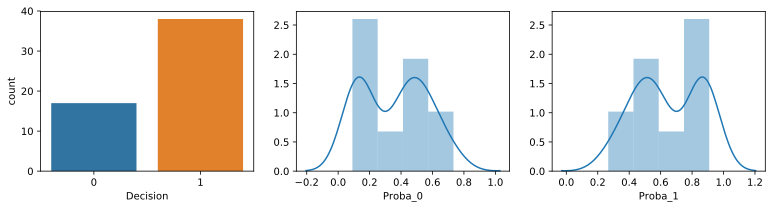

In [90]:
# Distributions
categ =  [ 'Decision']
conti = ['Proba_0', 'Proba_1']

#Distribution
fig = plt.figure(figsize=(13, 10))
for i in range (0,len(categ)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(x=categ[i], data=Scoring);  

for col in conti:
    fig.add_subplot(3,3,i + 2)
    sns.distplot(Scoring[col].dropna());
    i += 1
    
plt.show()
fig.clear()

### 4.4 Exportation des scores dans un fichier CSV

In [91]:
# Export CSV
Scoring.to_csv(r'Titanic_scoring.csv')

In [92]:
%ls Titanic_scoring.csv

 Volume in drive C is Windows
 Volume Serial Number is 50AC-78FD

 Directory of C:\Users\seretkow\notebooks\Labs Azure ML service

05-Mar-19  16:59             2,459 Titanic_scoring.csv
               1 File(s)          2,459 bytes
               0 Dir(s)  48,450,236,416 bytes free
